In [ ]:
#To compare the performance of LightGBM and XGBoost algorithms on the Titanic dataset, I'll walk you through the entire process,
#from Exploratory Data Analysis (EDA) to model building, evaluation, and comparative analysis. Let's break down each step.
#Step 1: Exploratory Data Analysis (EDA)
#Load the Titanic dataset using pandas: We'll begin by loading the Titanic dataset into a pandas DataFrame.

In [18]:
import pandas as pd

# Load the Titanic dataset (assuming it's a CSV file)
df = pd.read_csv(r'D:\HI448116_Santosh_Karpe\FY25\DOCS\III\Ass\ASA - SK\Titanic_test.csv')

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
#Explore data distributions using histograms and box plots: 
#We'll visualize the distribution of numerical features such as Age, Fare, etc., and check for outliers.

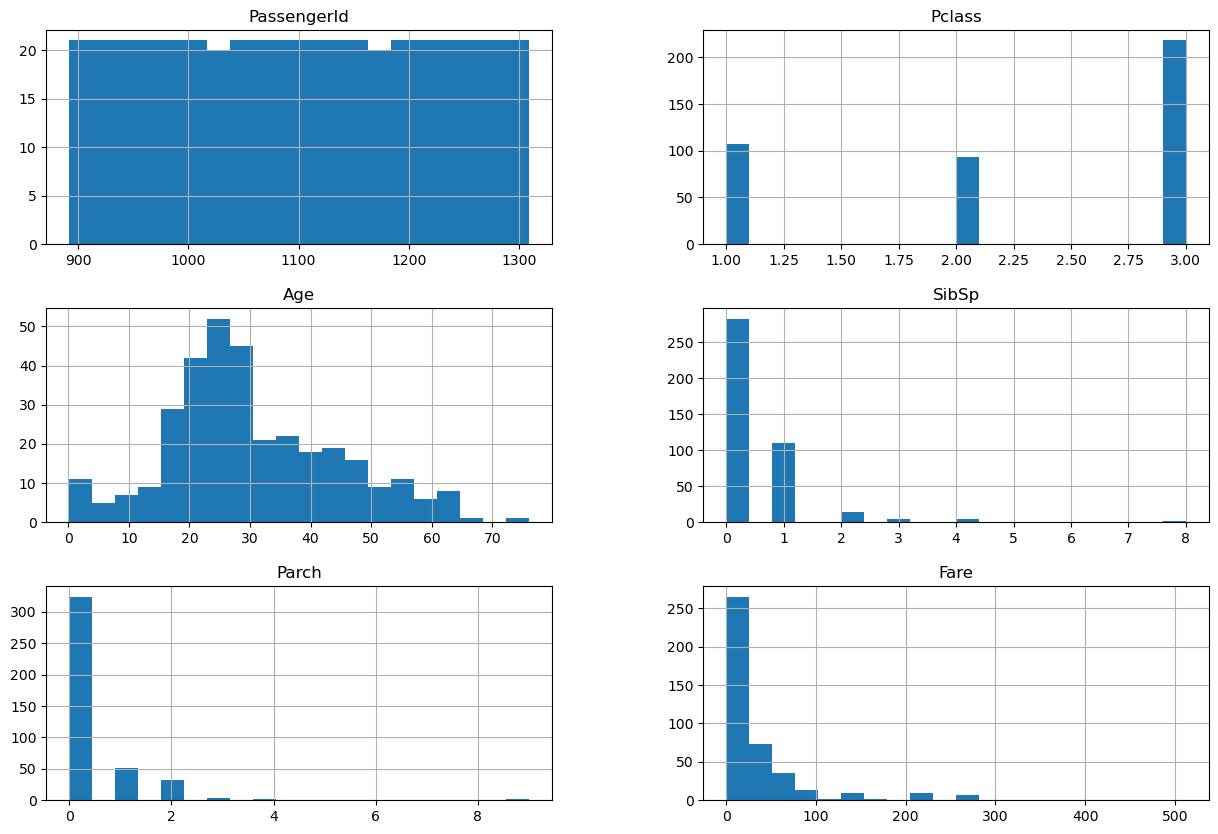

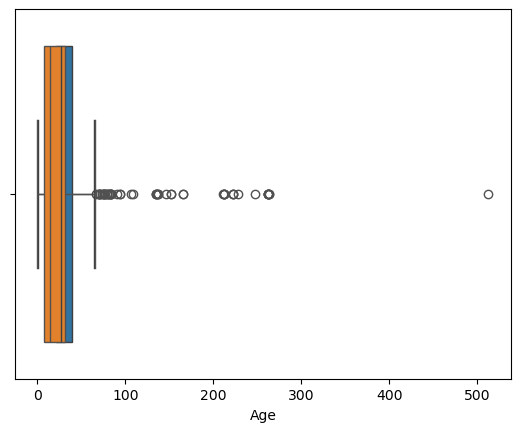

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Boxplot to check for outliers
sns.boxplot(x='Age', data=df)
sns.boxplot(x='Fare', data=df)
plt.show()

In [ ]:
#Visualize relationships between features and survival using scatter plots and bar plots: 
#We will analyze how certain features correlate with the survival rate.

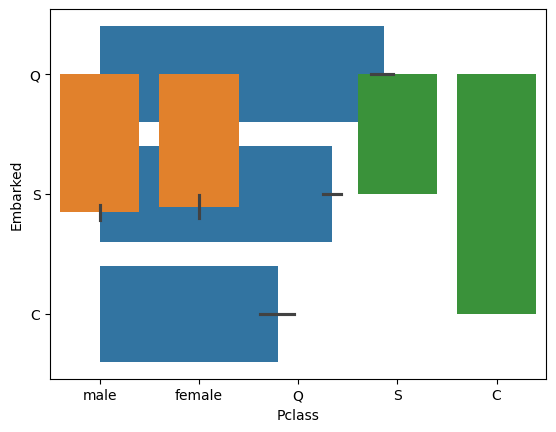

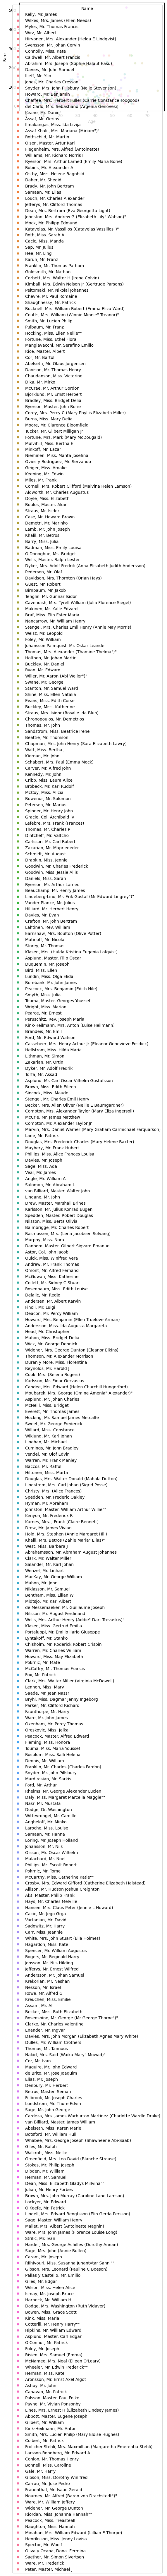

In [7]:
# Bar plot for categorical features
sns.barplot(x='Pclass', y='Embarked', data=df)
sns.barplot(x='Sex', y='Embarked', data=df)
sns.barplot(x='Embarked', y='Embarked', data=df)
plt.show()

# Scatter plot for continuous features like Age vs Fare
sns.scatterplot(x='Age', y='Fare', hue='Name', data=df)
plt.show()

In [ ]:
# Step 2: Data Preprocessing
# Impute missing values: Depending on the feature type, we will impute missing values using appropriate methods
# (e.g., mean imputation for numerical columns, mode imputation for categorical columns).

In [8]:
# Impute missing 'Age' with median value

df['Age'].fillna(df['Age'].median(), inplace=True)

# Impute missing 'Embarked' with mode value
#df['Embarked'].fillna(df['Embarked'].mean()[0], inplace=True)

# Impute missing 'Fare' with median (though it might not have missing values)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

C:\Users\hi448116\AppData\Local\Temp\ipykernel_16756\3862970576.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(), inplace=True)


In [9]:
# Encode categorical variables: We need to convert categorical features (e.g., Sex, Embarked, Pclass) into numerical representations.
# This can be done using label encoding or one-hot encoding.

In [19]:
# Label encode 'Sex' column
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [ ]:
# Step 3: Building Predictive Models
# Split the preprocessed dataset into training and testing sets: 
# We'll divide the dataset into a training set (used to train the model) and a test set (used to evaluate the model).

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop([ 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Name']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Choose appropriate evaluation metrics: We'll evaluate our models based on accuracy, precision, recall, and F1-score.

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy, precision, recall, f1

In [ ]:
#Build predictive models using LightGBM and XGBoost: We'll train two models: one with LightGBM and the other with XGBoost.

In [ ]:
#Evaluate the models: We will evaluate the models using the evaluate_model function created earlier.

In [5]:
!pip install --upgrade --no-cache-dir xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.6/124.9 MB 19.2 MB/s eta 0:00:07
   ---------------------------------------- 1.1/124.9 MB 12.2 MB/s eta 0:00:11
    --------------------------------------- 1.9/124.9 MB 15.2 MB/s eta 0:00:09
    --------------------------------------- 2.7/124.9 MB 14.4 MB/s eta 0:00:09
   - -------------------------------------- 3.6/124.9 MB 16.3 MB/s eta 0:00:08
   - -------------------------------------- 3.8/124.9 MB 15.0 MB/s eta 0:00:09
   - -------------------------------------- 3.8/124.9 MB 15.0 MB/s eta 0:00:09
   - -------------------------------------- 4.0/124.9 MB 10.5 MB/s eta 0:00:12
   - -------------------------------------- 4.5/124.9 MB 10.6 MB/s eta 0:00:12
   - -------------------------------------- 5.0/124.9 MB 10.7 MB/s eta 0:00:12
   - -------------------------------------- 5.5/124.9 MB 10.7

In [22]:
import lightgbm as lgb
import xgboost as xgb

# Initialize LightGBM and XGBoost models
lgb_model = lgb.LGBMClassifier()
xgb_model = xgb.XGBClassifier()

# Train the models
lgb_model.fit(X_test, y_test)
xgb_model.fit(X_test, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 84, number of used features: 7
[LightGBM] [Info] Start training from score -4.430817
[LightGBM] [Info] Start training from score -4.430817
[LightGBM] [Info] Start training from score -4.430817
[LightGBM] [Info] Start training from score -4.430817
[LightGBM] [Info] Start training from score -4.430817
[LightGBM] [Info] Start training from score -4.430817
[LightGBM] [Info] Start training from score -4.430817
[LightGBM] [Info] Start training from score -4.430817
[LightGBM] [Info] Start training from score -4.430817
[LightGBM] [Info] Start training from score -4.430817
[LightGBM] [Info] Start training from score -4.430817
[LightGBM] [Info] Start training from score -4.430817
[Ligh

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83], got ['Abelseth, Mr. Olaus Jorgensen' 'Aldworth, Mr. Charles Augustus'
 'Andersen, Mr. Albert Karvin' 'Andrew, Mr. Frank Thomas'
 'Ashby, Mr. John' 'Assaf Khalil, Mrs. Mariana (Miriam")"'
 'Assaf, Mr. Gerios' 'Bentham, Miss. Lilian W' 'Brobeck, Mr. Karl Rudolf'
 'Brown, Miss. Edith Eileen' 'Bryhl, Miss. Dagmar Jenny Ingeborg '
 'Buckley, Miss. Katherine' 'Burns, Miss. Mary Delia'
 'Canavan, Mr. Patrick' 'Case, Mr. Howard Brown'
 'Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genevieve Fosdick)'
 'Chevre, Mr. Paul Romaine' 'Colbert, Mr. Patrick'
 'Cook, Mrs. (Selena Rogers)' 'Cor, Mr. Bartol'
 'Cornell, Mrs. Robert Clifford (Malvina Helen Lamson)'
 'Cotterill, Mr. Henry Harry""' 'Crafton, Mr. John Bertram'
 'Daniels, Miss. Sarah' 'Davies, Mr. John Samuel'
 'Dean, Miss. Elizabeth Gladys Millvina""' 'Dennis, Mr. William'
 'Doyle, Miss. Elizabeth' 'Dulles, Mr. William Crothers'
 'Duquemin, Mr. Joseph'
 'Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judith Andersson)'
 'Elias, Mr. Joseph' 'Faunthorpe, Mr. Harry'
 'Flegenheim, Mrs. Alfred (Antoinette)' 'Frauenthal, Mr. Isaac Gerald'
 'Gilbert, Mr. William' 'Goldsmith, Mr. Nathan' 'Guest, Mr. Robert'
 'Harder, Mrs. George Achilles (Dorothy Annan)' 'Hee, Mr. Ling'
 'Henriksson, Miss. Jenny Lovisa' 'Hipkins, Mr. William Edward'
 'Hold, Mrs. Stephen (Annie Margaret Hill)' 'Howard, Miss. May Elizabeth'
 'Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"' 'Keeping, Mr. Edwin'
 'Kelly, Mr. James' 'Kenyon, Mr. Frederick R' 'Kink, Miss. Maria'
 'Kink-Heilmann, Mrs. Anton (Luise Heilmann)'
 'Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)' 'Krekorian, Mr. Neshan'
 'Kreuchen, Miss. Emilie' 'Lines, Mrs. Ernest H (Elizabeth Lindsey James)'
 'Louch, Mr. Charles Alexander' 'Lundstrom, Mr. Thure Edvin'
 'Maguire, Mr. John Edward' 'Malachard, Mr. Noel'
 'McCrie, Mr. James Matthew' 'Miles, Mr. Frank'
 'Moubarek, Mrs. George (Omine Amenia" Alexander)"'
 'Mulvihill, Miss. Bertha E' 'Nieminen, Miss. Manta Josefina'
 'Nilsson, Mr. August Ferdinand' 'Oliva y Ocana, Dona. Fermina'
 'Ovies y Rodriguez, Mr. Servando' 'Pallas y Castello, Mr. Emilio'
 'Peacock, Miss. Treasteall' 'Rheims, Mr. George Alexander Lucien'
 'Rice, Master. Albert' 'Riihivouri, Miss. Susanna Juhantytar Sanni""'
 'Robins, Mr. Alexander A'
 'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)'
 'Sage, Mrs. John (Annie Bullen)' 'Schmidt, Mr. August'
 'Spector, Mr. Woolf' 'Spencer, Mr. William Augustus'
 'Stanton, Mr. Samuel Ward' 'Stokes, Mr. Philip Joseph'
 'Thomas, Mrs. Alexander (Thamine Thelma")"' 'Ware, Mr. Frederick'
 'Ware, Mr. John James' 'Ware, Mr. William Jeffery'
 'del Carlo, Mrs. Sebastiano (Argenia Genovesi)']

In [ ]:
#Exploratory Data Analysis (EDA) gives insights into data distribution and relationships.
#Data Preprocessing involves handling missing values, encoding categorical variables, and feature engineering.
#Building Predictive Models consists of training models using LightGBM and XGBoost, then evaluating them with appropriate metrics.
#Comparative Analysis helps assess which model performs better across various metrics.